In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
a=np.asarray([2,3,1])
b=np.asarray([1,4,8])
l2=np.sum(((a-b)**2))**0.5
l2

7.14142842854285

In [3]:
l1=np.sum(abs(b-a))
l1

9

In [4]:
#Generating Data

(500, 2)


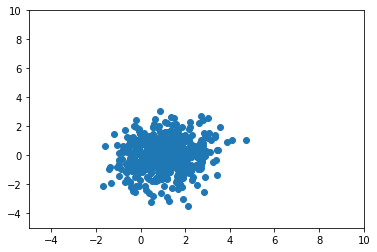

In [5]:
mean1=np.array([1,0])
cov1=np.array([[1,.1],[.1,1.2]])
dist1=np.random.multivariate_normal(mean1,cov1,500)
print(dist1.shape)
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,1])
plt.show()

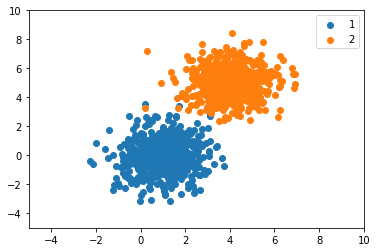

In [6]:
mean1=np.array([1,0])
cov1=np.array([[1,.1],[.1,1.2]])
dist1=np.random.multivariate_normal(mean1,cov1,500)

mean2=np.array([4,5])
cov1=np.array([[1,.1],[.1,1.2]])
dist2=np.random.multivariate_normal(mean2,cov1,500)

plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0],dist1[:,1],label='1')
plt.scatter(dist2[:,0],dist2[:,-1],label='2')
plt.legend()
plt.show()

In [7]:
#merging both data sets

In [8]:
data=np.zeros((1000,3))
data[:500,:2]=dist1
data[500:,:2]=dist2
#data[:500,2]=0
data[500:,-1]=1

In [9]:
print(data.shape)
print(data.mean(axis=0))

(1000, 3)
[2.50217781 2.4807821  0.5       ]


In [10]:
np.random.shuffle(data)

In [11]:
def distance(a,b):
    return (np.sum((a-b)**2))**0.5

In [12]:
#shape of x_train=1000,2
# shape of y_tain=1000,1

In [20]:
def knn(x_train,y_train,test_point,k=7): #by default 7 nearest neighbours
    distances=[]
    m=x_train.shape[0]
    for i in range(m):
        d=distance(x_train[i],test_point)
        distances.append([d,y_train[i]]) #distances and labels are added in the list
    sorted_labels=sorted(distances,key=lambda r: r[0])
    neighbors=np.asarray(sorted_labels)[:k,-1] #labels are fetched
    #print(neighbors)
    frequency=np.unique(neighbors,return_counts=True) #returns a 2-d list with unique  
                                                            #values followed by their count 
    index=frequency[1].argmax() #fetching the index of max frequency
    return frequency[0][index] #fetching the value label with max frequency

In [21]:
x_train=data[:,:2]
y_train=data[:,-1]
test_point=np.array([4,3])
knn(x_train,y_train,test_point)

1.0

In [22]:
knn(x_train,y_train,[2.5,2])

0.0

In [23]:
x_train=data[:750,:2]
y_train=data[:750,-1]
x_test=data[750:,:2]
y_test=data[750:,-1]
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [24]:
def acc(k):
    predictions=[]
    m=x_test.shape[0]
    for i in range(m):
        test_point=x_test[i]
        predicted_label=knn(x_train,y_train,test_point,k)
        predictions.append(predicted_label)
    preds=np.asarray(predictions) 
    
    return 100*(preds==y_test).sum()/m


In [25]:

for k in range(1,10,2):
    print(f"For k={k} Acc={acc(k)}")

For k=1 Acc=99.6
For k=3 Acc=99.2
For k=5 Acc=99.6
For k=7 Acc=99.6
For k=9 Acc=99.6
